In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def gen_num():
    arr=np.random.uniform(low=0, high=10, size=(100, 2))
  #  return list(map(tuple, arr))
    return arr

# gen = gen_num() 
# print(gen[:,0],gen[:,1])
# plt.plot(gen[:,0],gen[:,1],'.')

In [ ]:
def cen(l,ks):
  cen=[]
  for i in range (ks):
  #  cen[i]= np.random.choice(l)
    idx = np.random.randint(100, size=1)
   # print(idx)
   # print(l[idx])
    cen.append(l[idx,:])
  return cen

In [ ]:
# print(cen(gen_num(),3))

[array([[6, 6]]), array([[5, 0]]), array([[1, 4]])]


In [ ]:
def dis(lis,cen1):
  
  dis=[]
  for j in cen1 :
    for i in lis:
      err=j-i
    #  print(j,i,err)
      dis.append((np.linalg.norm(err)))
  return dis




In [ ]:
# l=gen_num()
# k=cen(l,3)

# k

[array([[5.9555898 , 4.53179488]]),
 array([[4.95395049, 3.41256809]]),
 array([[1.37933046, 8.07728111]])]

In [ ]:
from functools import reduce

In [ ]:
def km(k_no,l):

 ks=cen(l,k_no)
 cost=[]
 itr=0
 while(True):
  dictf=dict()
  dist =[ dis(l,k) for k in ks ]
  arr= np.array(dist)

  err=(arr.min(axis=0).sum())/len(l)
  cost.append(err)
 # print(err,'llll',arr)
  clust=np.argmin(arr, axis=0)
  clas=list(zip(l,clust))
  s_cluster=sorted(clas, key=lambda x: x[1])
  
  for poi,cl in s_cluster:
      dictf.setdefault(cl , []).append(poi) 

  d=dict(sorted(dictf.items()))
  new_k=[]
  for key,value in d.items(): 
  #  print(key, reduce(lambda x, y: x + y, d[key]) / len(d[key]))
    new_k.append(reduce(lambda x, y: x + y, d[key]) / len(d[key]))
  
  if itr!=0 and abs(cost[-2]-cost[-1])<0.0001:
     break
  #print( np.array(new_k)- np.array(all_k[-1])<.001)
  ks=new_k
  itr+=1
  
  return  new_k,dictf,cost[-1]

   
  


In [ ]:
# km(3,l)

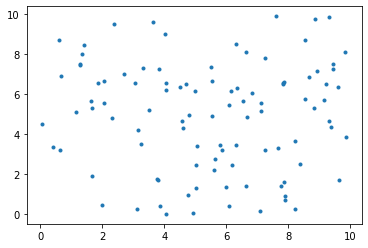

In [ ]:
l=gen_num()
plt.plot(l[:,0],l[:,1],'.')

In [ ]:
def k_loop(k_n,l):
  best_k=[]
  b_cost=[]
  for i in range (15):
    cent,data_clustered,cost=km(k_n,l)
    best_k.append((cent,data_clustered,cost))
    b_cost.append(cost)
  minn=min(b_cost)  
  index_of_maximum = (np.where(b_cost == minn))
  r=reduce(lambda sub, ele: sub * 10 + ele, index_of_maximum)
  #print(type(int(r)),r,minn)
  return(best_k[int(r)])


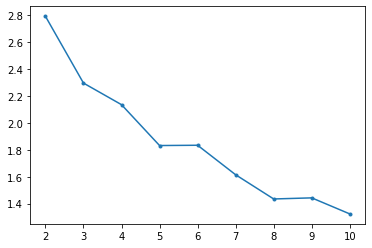

In [ ]:

all_cost=[]
for i in range (2,11):
  cent,data_clustered,cost=k_loop(i,l)
  all_cost.append(cost)
plt.plot(np.arange (2,11),np.array(all_cost),'.-')


In [ ]:
cent8,data_clustered8,cost8=k_loop(8,l)

In [ ]:
cent8=np.array(cent8)
cent8

array([[6.71038286, 1.69380435],
       [6.11820039, 6.11140415],
       [8.84219619, 9.25055098],
       [9.02975207, 5.58961358],
       [1.83977613, 5.85198921],
       [3.85078503, 1.83499887],
       [3.05459427, 8.16458507],
       [0.89750098, 2.83396105]])

In [ ]:
cent8[:,0],cent8[:,1]

(array([6.71038286, 6.11820039, 8.84219619, 9.02975207, 1.83977613,
        3.85078503, 3.05459427, 0.89750098]),
 array([1.69380435, 6.11140415, 9.25055098, 5.58961358, 5.85198921,
        1.83499887, 8.16458507, 2.83396105]))

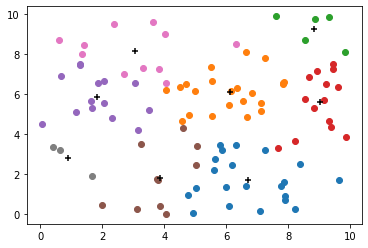

In [ ]:
for cluster,values in data_clustered8.items() :
  X=[]
  Y=[]
  for x,y in values:
    X.append(x)
    Y.append(y)
  plt.scatter(X,Y)
plt.scatter(cent8[:,0],cent8[:,1],marker='+',color='black')